In [1]:
#ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
%matplotlib inline

#グラフの見た目変更
plt.style.use("ggplot")

In [2]:
#Aの袋を選んだ場合に白球を選ぶ確率
p_a=3/10
#Bの袋を選んだ場合に白玉を選ぶ確率
p_b=3/5
#事前分布（Aの袋を選ぶ確率）
p_prior=0.6
#0:黒の球、1:白の球として引いた球の配列を準備
data=[1,0,1,1,1,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0]
#何回目まで引くのかを指定
N_data=10

In [3]:
#aの袋に対しての尤度関数
likehood_a=bernoulli.pmf(data[:N_data],p_a)
#bの袋に対しての尤度関数
likehood_b=bernoulli.pmf(data[:N_data],p_b)

print('likehood_a',likehood_a)
print('likehood_b',likehood_b)

likehood_a [0.3 0.7 0.3 0.3 0.3 0.7 0.3 0.7 0.7 0.7]
likehood_b [0.6 0.4 0.6 0.6 0.6 0.4 0.6 0.4 0.4 0.4]


In [4]:
#事後分布に事前分布を代入
pa_posterior=p_prior
pb_posterior=p_prior

#事後分布を尤度関数で更新
pa_posterior*=np.prod(likehood_a)
pb_posterior*=np.prod(likehood_b)

#規格化因子を求める
norm=pa_posterior+pb_posterior

#事後分布を規格化
pa_posterior/=norm
pb_posterior/=norm

#結果の表示
print('Aの袋の確率：',pa_posterior)
print('Bの袋の確率：',pb_posterior)

Aの袋の確率： 0.33902168431669183
Bの袋の確率： 0.6609783156833081


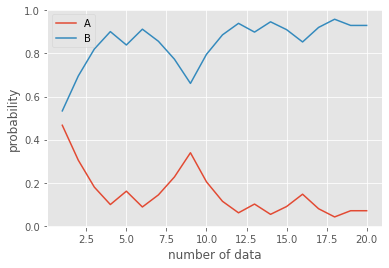

In [5]:
x=np.arange(20)+1

#それぞれのデータ数に対応した値を格納するリスト
pa_posterior_list=[]
pb_posterior_list=[]

for i in x:
    likehood_a=bernoulli.pmf(data[:(i+1)],p_a)
    likehood_b=bernoulli.pmf(data[:(i+1)],p_b)
    
    pa_posterior=p_prior
    pb_posterior=p_prior

    pa_posterior*=np.prod(likehood_a)
    pb_posterior*=np.prod(likehood_b)

    norm=pa_posterior+pb_posterior

    pa_posterior/=norm
    pb_posterior/=norm
    
    #リストに値を追加
    pa_posterior_list.append(pa_posterior)
    pb_posterior_list.append(pb_posterior)

plt.xlabel('number of data')
plt.ylabel('probability')
plt.plot(x,pa_posterior_list,label='A')
plt.plot(x,pb_posterior_list,label='B')
plt.legend()

plt.savefig('./figure/fig1.jpg')